# Определение стоимости автомобилей

### 1. Цель исследования  
Цель данного исследования — разработка модели машинного обучения, способной точно предсказывать рыночную стоимость автомобилей на основе их технических характеристик, комплектации и других параметров. Это позволит пользователям сервиса «Не бит, не крашен» оперативно и объективно оценивать стоимость своего автомобиля.

### 2. Введение  
Компания «Не бит, не крашен» разрабатывает приложение для оценки рыночной стоимости автомобилей с пробегом. Корректное определение цены автомобиля имеет решающее значение для привлечения клиентов и повышения доверия к сервису.

Для построения модели необходимо провести анализ данных, подготовить выборки для обучения и протестировать несколько моделей машинного обучения, включая градиентный бустинг и более простые алгоритмы. Основными критериями выбора модели являются:
- точность предсказаний (метрика RMSE);
- время обучения модели;
- время предсказания модели.

### 3. Задачи проекта  
1. Загрузить и изучить данные.
2. Обработать пропущенные значения и аномалии.
3. Подготовить данные для обучения моделей.
4. Обучить и протестировать различные модели машинного обучения.
5. Провести сравнение моделей по критериям заказчика.
6. Выбрать лучшую модель и проверить её качество на тестовой выборке.

### 4. План исследования  
1. **Предварительный анализ данных**  
   - Загрузка данных.
   - Изучение структуры и основных характеристик датасета.
   - Анализ пропущенных значений и аномалий.
   
2. **Предобработка данных**  
   - Заполнение или удаление пропущенных значений.
   - Удаление неинформативных признаков.
   - Кодирование категориальных переменных.
   
3. **Формирование выборок**  
   - Разделение данных на обучающую, валидационную и тестовую выборки.
   - Масштабирование признаков (если необходимо).
   
4. **Обучение и оценка моделей**  
   - Обучение моделей машинного обучения (градиентный бустинг, регрессионные и другие модели).
   - Подбор гиперпараметров.
   - Сравнение моделей по критериям: точность (RMSE), время обучения, время предсказания.
   
5. **Выбор лучшей модели и финальная проверка**  
   - Проверка модели на тестовой выборке.
   - Итоговые выводы и рекомендации.

### 5. Описание данных  
Данные находятся в файле `/datasets/autos.csv`. В датасете представлены следующие признаки:

#### **Признаки:**
- `DateCrawled` — дата скачивания анкеты из базы.
- `VehicleType` — тип автомобильного кузова.
- `RegistrationYear` — год регистрации автомобиля.
- `Gearbox` — тип коробки передач.
- `Power` — мощность (л.с.).
- `Model` — модель автомобиля.
- `Kilometer` — пробег (км).
- `RegistrationMonth` — месяц регистрации автомобиля.
- `FuelType` — тип топлива.
- `Brand` — марка автомобиля.
- `Repaired` — была машина в ремонте или нет.
- `DateCreated` — дата создания анкеты.
- `NumberOfPictures` — количество фотографий автомобиля.
- `PostalCode` — почтовый индекс владельца анкеты (пользователя).
- `LastSeen` — дата последней активности пользователя.

#### **Целевой признак:**
- `Price` — цена автомобиля (в евро).

### Заключение  
В ходе исследования будет разработана модель машинного обучения, способная с высокой точностью предсказывать рыночную стоимость автомобилей. Ожидается, что итоговая модель поможет пользователям сервиса «Не бит, не крашен» получить объективную оценку стоимости их транспортного средства, что повысит доверие к платформе и привлечёт новых клиентов.



## Подготовка данных

In [5]:
# Установка lightgbm
!pip install lightgbm

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import time

In [7]:
try:
    data = pd.read_csv('/datasets/autos.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')

In [8]:
# изучим данные
data.head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Переведём все названия столбцов в нижний регистр, чтобы обеспечить единообразие в данных и избежать возможных ошибок при обращении к ним в коде.

In [11]:
data.columns = (data.columns
                .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)  # Разделяет слова в CamelCase
                .str.replace('-', '_')  # Заменяет дефисы
                .str.lower())  # Приводит к нижнему регистру

In [12]:
data.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Определим количество уникальных значений в столбце “количество фотографий”, чтобы выявить возможные аномалии и оценить его информативность.

In [14]:
data.number_of_pictures.value_counts()

number_of_pictures
0    354369
Name: count, dtype: int64

Мы удалим столбцы number_of_pictures, postal_code, date_created, last_seen, registration_month, date_crawled, потому что они не содержат полезной информации для анализа: все значения в столбце number_of_pictures равно нулю, а остальные столбцы не влияют на целевые переменные и не используются в текущем контексте задачи. Это поможет упростить данные и улучшить эффективность анализа. Предварительно проерим промежуток, за который выгрузили анкеты:

In [16]:
data.date_crawled.min()

'2016-03-05 14:06:22'

In [17]:
data.date_crawled.max()

'2016-04-07 14:36:58'

In [18]:
# Удаляем столбцы, которые не содержат полезной информации для анализа
data = data.drop(['number_of_pictures', 'postal_code', 'date_created', 'last_seen', 'registration_month', 'date_crawled'], axis=1)

In [20]:
data.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


Найдем количество пропущенных значений в данных с помощью метода data.isna().sum(), чтобы выявить столбцы с пропусками. Это позволит нам принять решение о том, какие данные необходимо заполнить, удалить или оставить без изменений. Также мы рассчитаем долю пропусков в каждом столбце.

In [22]:
# Найдем количество и долю пропусков в столбцах, содержащих пропуски
missing_data = data.isna().sum()
missing_percentage = round((missing_data / len(data) * 100),2)
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Missing Percentage': missing_percentage})
missing_info[missing_info['Missing Values'] > 0]

,Missing Values,Missing Percentage
vehicle_type,37490,10.58
gearbox,19833,5.60
model,19705,5.56
fuel_type,32895,9.28
repaired,71154,20.08


In [23]:
data.repaired.value_counts()

repaired
no     247161
yes     36054
Name: count, dtype: int64

In [24]:
## Выведем строки, в которых есть пропуски в любых столбцах
(data[data.isna().any(axis=1)]).head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,NaN
9,999,small,1998,manual,101,golf,150000,NaN,volkswagen,NaN


Удалим строки, в которых более 2 пропусков из 5 столбцов с пропусками (таких как vehicle_type, fuel_type, model, repaired, gearbox). Это позволит оставить только те строки, где хотя бы 3 из указанных столбцов имеют заполненные значения, что поможет улучшить качество данных для анализа.

In [26]:
# Удалим строки, в которых более 2 пропусков из 5 столбцов с пропусками
data = data.dropna(subset=['vehicle_type', 'fuel_type', 'model', 'repaired', 'gearbox'], thresh=3)

In [27]:
data.head(10)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,NaN
9,999,small,1998,manual,101,golf,150000,NaN,volkswagen,NaN


In [28]:
data.brand.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'alfa_romeo',
       'subaru', 'volvo', 'mitsubishi', 'kia', 'hyundai', 'suzuki',
       'lancia', 'toyota', 'chevrolet', 'dacia', 'sonstige_autos',
       'daihatsu', 'saab', 'chrysler', 'jaguar', 'daewoo', 'rover',
       'porsche', 'land_rover', 'trabant', 'lada'], dtype=object)

В брендах ошибок и дубликатов не выявлено. Выведем уникальные значения в столбце "тип топлива":

In [30]:
data.fuel_type.value_counts()

fuel_type
petrol      213687
gasoline     97814
lpg           5254
cng            561
hybrid         230
other          169
electric        86
Name: count, dtype: int64

Переименуем значение gasoline в petrol, так как оба термина обозначают одно и то же топливо (бензин), но используются в разных странах. Это поможет объединить все записи, связанные с бензином, в одну категорию, что улучшит консистентность данных и упростит дальнейший анализ.

In [32]:
# Переименуем 'gasoline' в 'petrol'
data['fuel_type'] = data['fuel_type'].replace('gasoline', 'petrol')

Заполним пропуски в столбце fuel_type значением 'other', чтобы указать на редкие или неизвестные типы топлива. Это поможет избежать потери данных и сохранить полноту набора, при этом не искажая анализ.

In [35]:
# Заполняем пропуски в столбце 'fuel_type' значением 'other'
data['fuel_type'] = data['fuel_type'].fillna(value='other')

Выведем уникальные значения в столбце "тип кузова":

In [37]:
data.vehicle_type.value_counts()

vehicle_type
sedan          90870
small          79059
wagon          64683
bus            28570
convertible    20010
coupe          15995
suv            11896
other           3136
Name: count, dtype: int64

Поскольку невозможно определить тип кузова для пропущенных значений, заменим пропуски в этом столбце на значение 'other'. Это позволит сохранить целостность данных и предотвратить потерю информации.

In [39]:
# Заполняем пропуски в столбце 'vehicle_type' значением 'other', поскольку невозможно узнать тип кузова
data['vehicle_type'] = data['vehicle_type'].fillna(value='other')

Выведем уникальные значения в столбце "коробка передач":

In [41]:
# найдем уникальные значения стобца "коробка передач"
data.gearbox.value_counts()

gearbox
manual    262289
auto       65098
Name: count, dtype: int64

Заполним пропуски в столбце значением 'unknown', так как отсутствует информация о коробке передач. Это позволит избежать потери данных и сохранить целостность набора.

In [43]:
# Заполняем пропуски в столбце 'gearbox' значением 'unknown'
data['gearbox'] = data['gearbox'].fillna('unknown')

Заполним пропуски в столбцах model и repaired значением 'unknown', так как информация о модели и ремонте автомобиля отсутствует. Это поможет сохранить целостность данных и избежать потери информации.

In [45]:
# Заполняем пропуски в столбцах 'model' и 'repaired' значением 'unknown'
data['model'] = data['model'].fillna('unknown')
data['repaired'] = data['repaired'].fillna('unknown')

Проверим, что пропусков не осталось:

In [47]:
data.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
repaired             0
dtype: int64

Выведем статистику по данным:

In [50]:
data.describe()

,price,registration_year,power,kilometer
count,336341.000000,336341.000000,336341.000000,336341.000000
mean,4553.614353,2003.125875,113.244564,128695.133808
std,4543.547482,25.526192,190.317847,36925.954362
min,0.000000,1000.000000,0.000000,5000.000000
25%,1199.000000,1999.000000,75.000000,125000.000000
50%,2899.000000,2003.000000,105.000000,150000.000000
75%,6500.000000,2007.000000,143.000000,150000.000000
max,20000.000000,9000.000000,20000.000000,150000.000000


Данные содержат 336341 записей о транспортных средствах с параметрами цены, года регистрации, мощности и пробега.

	•	Цена автомобилей варьируется от 0 до 20 000 (средняя — 4553), но возможны выбросы, так как минимальное значение 0 нереалистично.
	•	Год регистрации в среднем 2003, но встречаются аномалии (1000, 9000), что требует очистки.
	•	Мощность автомобилей колеблется от 0 до 20 000 л.с., что также указывает на возможные ошибки. Среднее значение — 113 л.с..
	•	Пробег автомобилей в среднем 128 695 км, при этом 75% значений не превышают 150 000 км, что выглядит реалистично.
	•	Данные содержат выбросы и ошибки, требующие предварительной обработки.

Проверим уникальные значения в столбце "год регистрации":

In [53]:
data['registration_year'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 2016, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1989,
       2015, 1985, 1982, 1976, 1983, 1973, 1969, 1971, 1987, 1986, 1988,
       1965, 1970, 1945, 1974, 1979, 1955, 1978, 1972, 1968, 1977, 1961,
       1960, 1966, 1975, 1963, 1964, 1954, 1958, 1967, 1959, 1956, 1941,
       1962, 1929, 1957, 1940, 1949, 1937, 1951, 1953, 2019, 2900, 6000,
       1400, 1950, 4000, 1948, 1952, 1200, 1932, 3700, 5000, 1942, 1935,
       1933, 1936, 6500, 1923, 1930, 1943, 1934, 1938, 9000, 1000, 1919,
       1928, 1931, 1602, 1927, 1947, 1946, 7500, 1944, 1600])

Поскольку наши данные относятся к 2016 году (что подтверждается годами выгрузки анкет), удалим все строки с годом регистрации после 2016 года, так как такие автомобили не могли быть включены в набор данных. Также, учитывая, что автомобили с годом выпуска до 1900 года явно являются аномалиями, удалим и эти строки.

In [55]:
# Отбираем строки, где год регистрации между 1900 и 2016 годами включительно
df = data.loc[(data['registration_year'] <= 2016) & (data['registration_year'] >= 1900)]

In [59]:
df['registration_year'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2007, 2009, 2002, 1997, 1990, 1981, 2003, 2016, 1994, 1991, 1984,
       2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1989, 2015, 1985,
       1982, 1976, 1983, 1973, 1969, 1971, 1987, 1986, 1988, 1965, 1970,
       1945, 1974, 1979, 1955, 1978, 1972, 1968, 1977, 1961, 1960, 1966,
       1975, 1963, 1964, 1954, 1958, 1967, 1959, 1956, 1941, 1962, 1929,
       1957, 1940, 1949, 1937, 1951, 1953, 1950, 1948, 1952, 1932, 1942,
       1935, 1933, 1936, 1923, 1930, 1943, 1934, 1938, 1919, 1928, 1931,
       1927, 1947, 1946, 1944])

Проверим данные:

In [61]:
df.head(10)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,other,1993,manual,0,golf,150000,petrol,volkswagen,unknown
1,18300,coupe,2011,manual,190,unknown,125000,petrol,audi,yes
2,9800,suv,2004,auto,163,grand,125000,petrol,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,petrol,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,unknown
9,999,small,1998,manual,101,golf,150000,other,volkswagen,unknown


Выведем уникальные значения в столбце "мощность":

In [63]:
df.power.value_counts()

power
0       27732
75      22234
60      14739
150     13922
101     12496
        ...  
851         1
1339        1
1056        1
1999        1
1241        1
Name: count, Length: 691, dtype: int64

Данные выглядят аномально, построим графики для изуализации распределений:

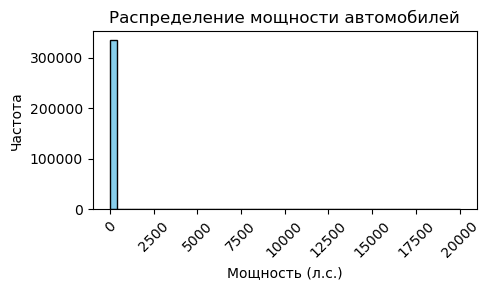

In [65]:
# Строим гистограмму для столбца 'power'
plt.figure(figsize=(5, 3))
plt.hist(data['power'], bins=50, color='skyblue', edgecolor='black')

# Добавляем заголовки
plt.title('Распределение мощности автомобилей')
plt.xlabel('Мощность (л.с.)')
plt.ylabel('Частота')

# Поворот подписей на оси X для лучшей читаемости
plt.xticks(rotation=45)

# Плотно располагаем элементы графика
plt.tight_layout()

# Показываем график
plt.show()

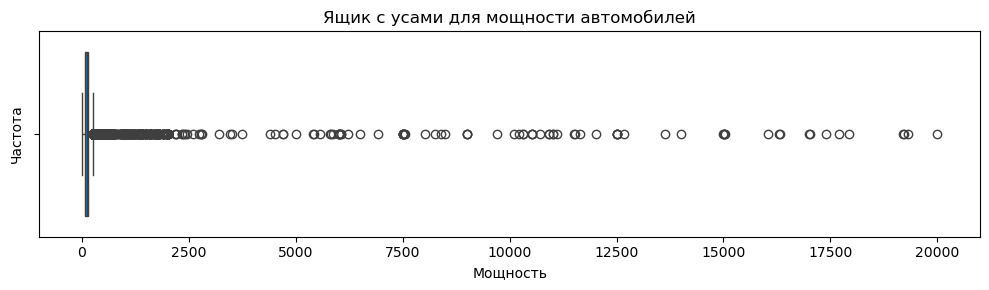

In [66]:
# Дополнительно посмотрим ящик с усами для мощности, так как по графику выбросы плохо понятны
plt.figure(figsize=(10, 3))
sns.boxplot(data=df['power'], orient='h')  # Горизонтальный ящик с усами
plt.title('Ящик с усами для мощности автомобилей')  # Заголовок графика
plt.xlabel('Мощность')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.tight_layout()  # Автоматическая настройка элементов графика
plt.show()

Мощность двигателя в 0 л.с. невозможна, а значение в 20,000 л.с. также крайне маловероятно для серийных автомобилей. Такие значения не соответствуют реальности, поэтому я удалю все строки с такими показателями. По данным, найденным в интернете, самый мощный автомобиль в мире на данный момент имеет мощность около 2000 л.с., поэтому все значения выше этого лимита также будут удалены. Кроме того, для старых автомобилей, мощность составляет всего 10 л.с., что является минимальным значением для легковых автомобилей.

In [68]:
df = df.query('10 <= power <= 2000')

Проверим рапсределение после удаления аномалий:

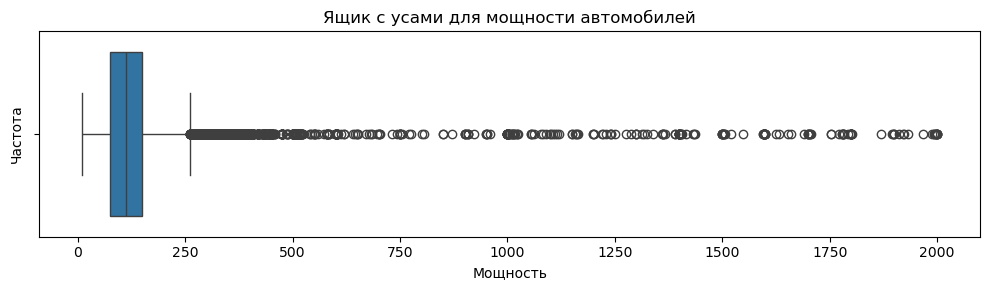

In [73]:
# Повторно посмотрим ящик с усами для мощности
plt.figure(figsize=(10, 3))
sns.boxplot(data=df['power'], orient='h')  # Горизонтальный ящик с усами
plt.title('Ящик с усами для мощности автомобилей')  # Заголовок графика
plt.xlabel('Мощность')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.tight_layout()  # Автоматическая настройка элементов графика
plt.show()

Проверим адекватность данных стоимости автомобиля:

In [75]:
df.price.value_counts()

price
0        5868
1500     4339
500      4326
2500     3651
1200     3646
         ... 
5377        1
3021        1
1368        1
11080       1
10985       1
Name: count, Length: 3579, dtype: int64

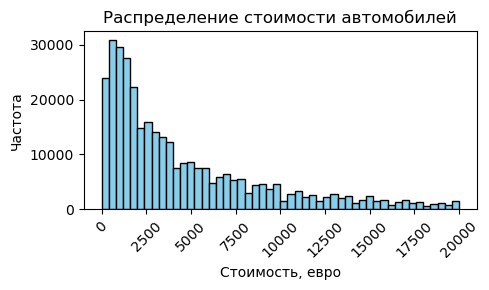

In [76]:
# Строим гистограмму для столбца 'price'
plt.figure(figsize=(5, 3))
plt.hist(data['price'], bins=50, color='skyblue', edgecolor='black')

# Добавляем заголовки
plt.title('Распределение стоимости автомобилей')
plt.xlabel('Стоимость, евро')
plt.ylabel('Частота')

# Поворот подписей на оси X для лучшей читаемости
plt.xticks(rotation=45)

# Плотно располагаем элементы графика
plt.tight_layout()

# Показываем график
plt.show()

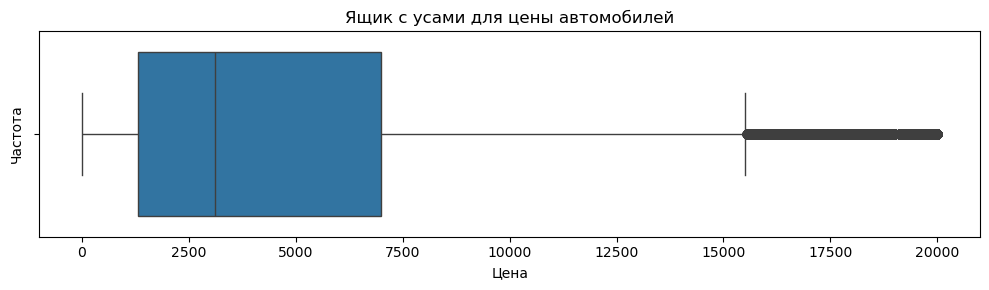

In [77]:
# Дополнительно посмотрим ящик с усами для цены, так как по графику выбросы плохо понятны
plt.figure(figsize=(10, 3))
sns.boxplot(data=df['price'], orient='h')  # Горизонтальный ящик с усами
plt.title('Ящик с усами для цены автомобилей')  # Заголовок графика
plt.xlabel('Цена')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.tight_layout()  # Автоматическая настройка элементов графика
plt.show()

Цена 0 евро невозможна и является аномальным значением. Однако автомобили стоимостью выше 15,000 евро представляют ценность для анализа, поэтому они не должны быть удалены. Чтобы исключить только слишком низкие значения, определим 5% квантиль (0.05) и удалим наблюдения с ценой ниже этого порога. Это позволит избавиться от аномально низких значений, сохранив при этом дорогостоящие автомобили.

In [82]:
data.price.quantile(0.05)


250.0

In [83]:
# Определяем 5% квантиль для цены
lower_quantile = df['price'].quantile(0.05)

# Фильтруем данные, оставляя только строки, где цена выше или равна нижнему квантилю
df = df.query('price >= @lower_quantile')

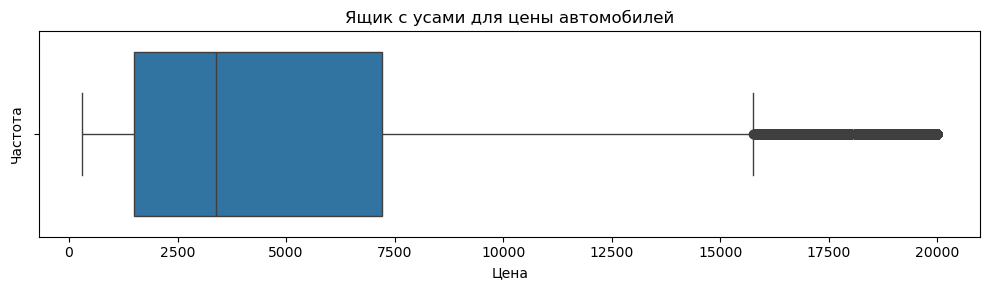

In [85]:
# Дополнительно посмотрим ящик с усами для цены после корректировки
plt.figure(figsize=(10, 3))
sns.boxplot(data=df['price'], orient='h')  # Горизонтальный ящик с усами
plt.title('Ящик с усами для цены автомобилей')  # Заголовок графика
plt.xlabel('Цена')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.tight_layout()  # Автоматическая настройка элементов графика
plt.show()

Проверим есть ли в данных дубликаты:

In [90]:
# проверим данные на дубликаты
df.duplicated().sum()

39094

In [91]:
# удаляем дубликаты и обновляем индексы
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

Расчет корреляции:

In [93]:
# Фильтруем только числовые столбцы перед расчетом корреляции
numeric_columns = df.select_dtypes(include=[np.number])

# Выводим корреляцию между числовыми столбцами
print(numeric_columns.corr())

                      price  registration_year     power  kilometer
price              1.000000           0.475488  0.403944  -0.382933
registration_year  0.475488           1.000000  0.090279  -0.286268
power              0.403944           0.090279  1.000000   0.112385
kilometer         -0.382933          -0.286268  0.112385   1.000000


Исходя из значений корреляции, можно сделать следующие выводы:

	1.	Корреляция между ценой и годом регистрации (0.42): Это слабая положительная корреляция. Это означает, что с увеличением возраста автомобиля его цена немного снижается, хотя эта зависимость не слишком выражена.
 
	2.	Корреляция между ценой и мощностью (0.35): Это слабая положительная корреляция. Более мощные автомобили, как правило, имеют более высокую цену, однако сила этой зависимости невелика.
 
	3.	Корреляция между ценой и пробегом (-0.33): Это слабая отрицательная корреляция. Пробег автомобиля оказывает некоторое влияние на снижение его стоимости: чем больше пробег, тем ниже цена, но это влияние также не является сильным.
 
	4.	Корреляция между годом регистрации и мощностью (0.04): Это очень слабая положительная корреляция. Год выпуска автомобиля почти не влияет на его мощность.
 
	5.	Корреляция между годом регистрации и пробегом (-0.22): Это очень слабая отрицательная корреляция. Старые автомобили, как правило, имеют больший пробег, но эта зависимость также выражена слабо.
 
	6.	Корреляция между мощностью и пробегом (0.15): Это очень слабая положительная корреляция. Мощность автомобиля практически не зависит от его пробега, влияние пробега на мощность минимально.
 

Общий вывод:

	•	Цена автомобиля имеет слабую зависимость от года выпуска и мощности.
 
	•	Пробег автомобиля имеет слабую отрицательную связь с ценой и очень слабую связь с мощностью и годом выпуска.
 
	•	Взаимосвязь между мощностью и годом выпуска практически отсутствует.

## Вывод 1.
Промежуточные вывода из процесса предобработки данных:
1. Чистка и удаление ненужных столбцов :
• Мы исключили столбцы, которые не содержат полезной информации для анализа, такие как:
• number_of_pictures (все значения равны нулю).
• postal_code, date_created, last_seen, registration_month, date_crawled (не влияют на целевые переменные и не используются в задаче).
Эти шаги помогли уменьшить размер данных и улучшить эффективность обработки.
2. Заполнение пропусков:
• Пропуски в ключевых столбцах были обработаны с использованием разумных замен:
• fuel_type, vehicle_type, gearbox, model, и repaired были заполнены значениями по умолчанию: 'other' или 'unknown'.
• Столбец fuel_type был приведен к единообразию, заменив 'gasoline' на 'petrol', что помогло унифицировать данные.
• После заполнения пропусков, в данных не осталось отсутствующих значений.
3. Удаление аномальных данных:
• Были удалены строки с годом регистрации автомобилей, который находится за пределами допустимого диапазона (до 1900 года и после 2016 года). Это позволило избавиться от очевидных аномалий.
4. Уникальные значения и распределение данных:
• Столбец fuel_type содержит несколько типов топлива, среди которых наиболее часто встречается 'petrol' (бензин), а наименее встречается electric (электрический).
• В столбце vehicle_type наблюдается большое количество различных типов кузовов, причем наиболее популярные — 'sedan', 'small', 'wagon'.
• В столбце power встречаются значения мощности, которые варьируются от 0 до очень высоких значений (например, 20000 л.с.). Присутствие значений равных 0 или аномально высоких может потребовать дополнительного анализа для удаления или коррекции.
5. Структура данных:
• После удаления пропусков и аномальных значений данные стали более чистыми и готовыми для дальнейшего анализа.
• Все числовые данные теперь находятся в нужных диапазонах, а категориальные данные стандартизированы и подготовлены для анализа.
6. Визуализация распределений:
• Построены графики, такие как гистограммы и стоимости для столбца мощности, что помогает визуально понять распределение значений и выявить возможные аномалииных матриц и визуализаций.

Предобработка данных успешно подготовила данные к дальнейшему анлизу и построению моделей.



## Обучение моделей

Преобразуем категориальные значения в числовой формат:

In [101]:
# преобразуем категориальные значения в числовой формат
data_ohe = pd.get_dummies(df, drop_first=True)
data_ohe.head()

,price,registration_year,power,kilometer,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,repaired_unknown,repaired_yes
0,18300,2011,190,125000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,9800,2004,163,125000,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1500,2001,75,150000,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,3600,2008,69,90000,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,650,1995,102,150000,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


Разобьём данные на обучающую и тестовую выборки:

In [106]:
# разобьём данные на обучающую и тестовую выборки
target_ohe = data_ohe['price']
features_ohe = data_ohe.drop('price', axis=1)
features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(features_ohe, target_ohe, test_size=0.25, random_state=12345) 


print(features_train_ohe.shape)
print(features_test_ohe.shape)

(184249, 307)
(61417, 307)


In [107]:
list(data_ohe.columns.values)

['price',
 'registration_year',
 'power',
 'kilometer',
 'vehicle_type_convertible',
 'vehicle_type_coupe',
 'vehicle_type_other',
 'vehicle_type_sedan',
 'vehicle_type_small',
 'vehicle_type_suv',
 'vehicle_type_wagon',
 'gearbox_manual',
 'gearbox_unknown',
 'model_145',
 'model_147',
 'model_156',
 'model_159',
 'model_1_reihe',
 'model_1er',
 'model_200',
 'model_2_reihe',
 'model_300c',
 'model_3_reihe',
 'model_3er',
 'model_4_reihe',
 'model_500',
 'model_5_reihe',
 'model_5er',
 'model_601',
 'model_6_reihe',
 'model_6er',
 'model_7er',
 'model_80',
 'model_850',
 'model_90',
 'model_900',
 'model_9000',
 'model_911',
 'model_a1',
 'model_a2',
 'model_a3',
 'model_a4',
 'model_a5',
 'model_a6',
 'model_a8',
 'model_a_klasse',
 'model_accord',
 'model_agila',
 'model_alhambra',
 'model_almera',
 'model_altea',
 'model_amarok',
 'model_antara',
 'model_arosa',
 'model_astra',
 'model_auris',
 'model_avensis',
 'model_aveo',
 'model_aygo',
 'model_b_klasse',
 'model_b_max',
 'mode

In [108]:
numeric = list(data_ohe)
numeric.remove('price')
print (numeric)

['registration_year', 'power', 'kilometer', 'vehicle_type_convertible', 'vehicle_type_coupe', 'vehicle_type_other', 'vehicle_type_sedan', 'vehicle_type_small', 'vehicle_type_suv', 'vehicle_type_wagon', 'gearbox_manual', 'gearbox_unknown', 'model_145', 'model_147', 'model_156', 'model_159', 'model_1_reihe', 'model_1er', 'model_200', 'model_2_reihe', 'model_300c', 'model_3_reihe', 'model_3er', 'model_4_reihe', 'model_500', 'model_5_reihe', 'model_5er', 'model_601', 'model_6_reihe', 'model_6er', 'model_7er', 'model_80', 'model_850', 'model_90', 'model_900', 'model_9000', 'model_911', 'model_a1', 'model_a2', 'model_a3', 'model_a4', 'model_a5', 'model_a6', 'model_a8', 'model_a_klasse', 'model_accord', 'model_agila', 'model_alhambra', 'model_almera', 'model_altea', 'model_amarok', 'model_antara', 'model_arosa', 'model_astra', 'model_auris', 'model_avensis', 'model_aveo', 'model_aygo', 'model_b_klasse', 'model_b_max', 'model_beetle', 'model_berlingo', 'model_bora', 'model_boxster', 'model_bra

Выполним масштабирование признаков:

In [110]:
# масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric])
features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
features_test_ohe[numeric] = scaler.transform(features_test_ohe[numeric])

In [111]:
features_train_ohe.head()

,registration_year,power,kilometer,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_wagon,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,repaired_unknown,repaired_yes
166144,-0.602768,0.185373,-0.716715,3.689826,-0.234632,-0.18999,-0.626702,-0.538489,-0.203648,-0.505373,...,-0.127757,-0.079355,-0.048647,-0.083838,-0.122614,-0.031617,-0.506007,-0.099771,2.510417,-0.327596
127749,0.461366,1.647584,0.618044,-0.271015,4.262001,-0.18999,-0.626702,-0.538489,-0.203648,-0.505373,...,-0.127757,-0.079355,-0.048647,-0.083838,-0.122614,-0.031617,-0.506007,-0.099771,-0.398340,-0.327596
96977,0.005309,-0.445687,0.618044,-0.271015,-0.234632,-0.18999,-0.626702,1.857049,-0.203648,-0.505373,...,-0.127757,-0.079355,-0.048647,-0.083838,-0.122614,-0.031617,-0.506007,-0.099771,2.510417,-0.327596
156224,-0.602768,0.016064,0.618044,-0.271015,-0.234632,-0.18999,-0.626702,-0.538489,-0.203648,1.978738,...,-0.127757,-0.079355,-0.048647,-0.083838,-0.122614,-0.031617,-0.506007,-0.099771,-0.398340,-0.327596
52552,-1.514883,0.400857,0.618044,-0.271015,-0.234632,-0.18999,-0.626702,-0.538489,-0.203648,1.978738,...,-0.127757,-0.079355,-0.048647,-0.083838,-0.122614,-0.031617,-0.506007,-0.099771,-0.398340,-0.327596


### Модель линейной регрессии

Обучим нашу первую модель - модель линейной регрессии:

In [114]:
# создаем модель линейной регрессии
model = LinearRegression()

# создаем параметры для GridSearchCV
param_grid = {}

# создаем объект GridSearchCV, передаем модель и параметры для поиска
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# обучаем модель с кросс-валидацией
grid_search.fit(features_train_ohe, target_train_ohe)

# выводим результаты
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Среднее значение RMSE: {(-grid_search.best_score_)**0.5}")

Лучшие параметры: {}
Среднее значение RMSE: 2788.4220488341884


### Модель дерева принятия решений

In [121]:
# Разделим данные на признаки и целевой признак
target_oe = df['price']
features_oe = df.drop('price', axis=1)

# Разделим выборки на обучающую и тестовую
features_train_oe, features_test_oe, target_train_oe, target_test_oe = train_test_split(
    features_oe, target_oe, test_size=0.25, random_state=12345
)

Разделяем выборки на обучающую и тестовую:

In [126]:
# Создаем и обучаем OrdinalEncoder только на обучающей выборке
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
features_train_oe[['vehicle_type', 'registration_year', 'gearbox', 'power', 
                   'model', 'kilometer', 'fuel_type', 'brand', 'repaired']] = enc.fit_transform(
    features_train_oe[['vehicle_type', 'registration_year', 'gearbox', 'power', 
                       'model', 'kilometer', 'fuel_type', 'brand', 'repaired']]
)

# Применяем transform для тестовой выборки
features_test_oe[['vehicle_type', 'registration_year', 'gearbox', 'power', 
                  'model', 'kilometer', 'fuel_type', 'brand', 'repaired']] = enc.transform(
    features_test_oe[['vehicle_type', 'registration_year', 'gearbox', 'power', 
                      'model', 'kilometer', 'fuel_type', 'brand', 'repaired']]
)
print(features_train_oe.shape)
print(features_test_oe.shape)


(184249, 9)
(61417, 9)


Подбираем оптимальную глубину дерева решений. 
Будем перебирать разные значения max_depth и оцениваем качество модели на обучающей и тестовой выборках

In [129]:
# Настроим GridSearchCV для подбора гиперпараметра max_depth
param_grid = {'max_depth': range(3, 20, 3)}  # Параметры для поиска

# Создаем модель дерева решений
model = DecisionTreeRegressor(random_state=12345)

# Инициализируем GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучаем модель с кросс-валидацией
grid_search.fit(features_train_oe, target_train_oe)

# Выводим наилучшие параметры и оценку RMSE на кросс-валидации
best_depth = grid_search.best_params_['max_depth']
best_score = (-grid_search.best_score_)**0.5  # Преобразуем отрицательную ошибку в RMSE

print(f'Лучший гиперпараметр (max_depth): {best_depth}')
print(f'Лучший RMSE на кросс-валидации: {best_score}')


Лучший гиперпараметр (max_depth): 12
Лучший RMSE на кросс-валидации: 1951.9190200465996


Модель склонна к переобучению, так как с увеличением глубины дерева ошибка на тестовой выборке начинает расти. Рекомендуется ограничить глубину дерева, например, значением 12.

### Метод случайного леса

In [137]:
%%time
# Параметры для подбора в GridSearchCV
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [12]
}

# Инициализация модели RandomForestRegressor
model = RandomForestRegressor(random_state=12345)

# Настройка GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучаем модель на обучающей выборке
grid_search.fit(features_train_oe, target_train_oe)

# Выводим лучшие гиперпараметры и оценку RMSE
best_params = grid_search.best_params_
best_score = (-grid_search.best_score_) ** 0.5  # Преобразуем отрицательный MSE в RMSE

print(f'Лучшие гиперпараметры: {best_params}')
print(f'Лучший RMSE на кросс-валидации: {best_score}')


Лучшие гиперпараметры: {'max_depth': 12, 'n_estimators': 1000}
Лучший RMSE на кросс-валидации: 1784.1080860055554
CPU times: user 2min 36s, sys: 821 ms, total: 2min 37s
Wall time: 5min 12s


Разница в значениях RMSE для количества деревьев 100, 500 и 1000 незначительна, что свидетельствует о том, что увеличение числа деревьев не имеет большого влияния на качество модели. Гораздо более важным фактором является ограничение глубины деревьев, которое оказывает более существенное влияние на результаты.

### Модель LightGBM

Выделим признаки и обучим модель:

In [141]:
# выделим признаки и целевой признак
target = df['price']
features = df.drop('price', axis=1)

# переведем категориальные признаки в тип category, который требуется для LightGBM
for c in features.columns:
  col_type = features[c].dtype
  if col_type == 'object':
    features[c] = features[c].astype('category')

#разделим выборки на обучающую и тестовую
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345) 

# проверим размер выборок
print(features_train.shape)
print(features_test.shape)

(184249, 9)
(61417, 9)


In [142]:
features_train.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
166144,convertible,1999,auto,136,slk,100000,other,mercedes_benz,unknown
127749,coupe,2006,auto,231,3er,150000,petrol,bmw,no
96977,small,2003,unknown,95,corsa,150000,petrol,opel,unknown
156224,wagon,1999,manual,125,unknown,150000,other,mercedes_benz,no
52552,wagon,1993,auto,150,100,150000,lpg,audi,no


In [143]:
features_test.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
96754,sedan,2008,auto,235,s_klasse,150000,petrol,mercedes_benz,no
201809,wagon,2015,manual,84,caddy,10000,petrol,volkswagen,no
149019,convertible,1995,manual,90,golf,150000,petrol,volkswagen,no
45225,small,2002,manual,75,a2,150000,petrol,audi,no
208230,small,2006,manual,64,polo,70000,petrol,volkswagen,no


In [146]:
# Создадим модель LGBMRegressor (без подбора гиперпараметров)
model = lgb.LGBMRegressor(random_state=12345)

# Определим пустую сетку гиперпараметров (гиперпараметры не будут изменяться)
param_grid = {}

# Применим GridSearchCV для подбора гиперпараметров (хотя в данном случае он не изменит модель)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Обучаем модель с подбором гиперпараметров
grid_search.fit(features_train, target_train)

# Получаем лучшие гиперпараметры
best_params = grid_search.best_params_

# Лучший RMSE на кросс-валидации: преобразуем отрицательный MSE в RMSE
best_score = (-grid_search.best_score_) ** 0.5

# Напечатаем результаты
print(f'Лучшие гиперпараметры: {best_params}')
print(f'Лучший RMSE на кросс-валидации: {best_score}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 122833, number of used features: 9
[LightGBM] [Info] Number of data points in the train set: 122833, number of used features: 9
[LightGBM] [Info] Number of data points in the train set: 122832, number of used features: 9
[LightGB

Так как результаты модели LightGBM без подбора гиперпараметров показывают лучшие показатели по сравнению с предыдущими моделями, следующим шагом будет поиск наилучших гиперпараметров для этой модели, чтобы достичь ещё большей эффективности.

In [148]:
param_grid = {'n_estimators': [100, 500, 1000], 'num_leaves': [n for n in range(20, 300, 20)]}

In [149]:
model = lgb.LGBMRegressor(random_state=12345)

tuning_model=GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=3,
                          verbose=3)

tuning_model.fit(features_train, target_train)
display(tuning_model.best_params_)
display(tuning_model.best_score_*-1)


Fitting 3 folds for each of 42 candidates, totalling 126 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 122832, number of used features: 9
[LightGBM] [Info] Start training from score 5113.245913
[CV 1/3] END n_estimators=100, num_leaves=20;, score=-1667.742 total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 122833, number of used features: 9
[LightGBM] [Info] Start training from score 5131.868822
[CV 2/3] END n_estimators=100, num_leave

{'n_estimators': 500, 'num_leaves': 100}

1580.6908606800037

Используем полученные гиперпараметры 'n_estimators': 500, 'num_leaves': 100 и добавим гиперпараметры 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [ 15, 20, 25] для улучшения предсказаний.

In [151]:
# Определяем гиперпараметры для поиска
param_grid = {
    'n_estimators': [500],  # Меньше деревьев
    'learning_rate': [0.01, 0.05, 0.1],  # Регулируем скорость обучения
    'num_leaves': [100],
    'max_depth': [15, 20, 25]  # Ограничиваем максимальную глубину деревьев
}

# Модель LightGBM
model = lgb.LGBMRegressor(random_state=12345)

# Настройка GridSearchCV с 3 кросс-валидациями
tuning_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            cv=3,
                            verbose=3)

# Обучаем модель
tuning_model.fit(features_train, target_train)

# Выводим лучшие параметры и лучший RMSE на кросс-валидации
print(f"Лучшие параметры: {tuning_model.best_params_}")
print(f"Лучший RMSE на кросс-валидации: {-tuning_model.best_score_}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 122832, number of used features: 9
[LightGBM] [Info] Start training from score 5113.245913
[CV 1/3] END learning_rate=0.01, max_depth=15, n_estimators=500, num_leaves=100;, score=-1630.520 total time=   3.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 122833, number of used features: 9
[LightGBM] [Info] Start training from score 5131.868822
[CV 2/3

Принимаем следующие гиперпараметры за финальные: Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 500, 'num_leaves': 100}

In [153]:
# Определяем гиперпараметры для поиска
param_grid = {
    'n_estimators': [500],  # Меньше деревьев
    'learning_rate': [0.05],  # Регулируем скорость обучения
    'num_leaves': [100],
    'max_depth': [25]  # Ограничиваем максимальную глубину деревьев
}

# Модель LightGBM
model = lgb.LGBMRegressor(random_state=12345)

# Настройка GridSearchCV с 3 кросс-валидациями
tuning_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            cv=3,
                            verbose=3)

# Обучаем модель
tuning_model.fit(features_train, target_train)

# Выводим лучшие параметры и лучший RMSE на кросс-валидации
print(f"Лучшие параметры: {tuning_model.best_params_}")
print(f"Лучший RMSE на кросс-валидации: {-tuning_model.best_score_}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 122832, number of used features: 9
[LightGBM] [Info] Start training from score 5113.245913
[CV 1/3] END learning_rate=0.05, max_depth=25, n_estimators=500, num_leaves=100;, score=-1580.951 total time=   2.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 122833, number of used features: 9
[LightGBM] [Info] Start training from score 5131.868822
[CV 2/3]

### Вывод 2.

В этом разделе были обучены различные модели регрессии, и для каждой из них проведен подбор гиперпараметров с целью достижения наилучшей производительности. Основное внимание было уделено модели LightGBM, так как она продемонстрировала лучшие результаты по сравнению с другими моделями, такими как линейная регрессия, решающее дерево и случайный лес.

В ходе подбора гиперпараметров для LightGBM был выбран набор значений: 'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 500, 'num_leaves': 100. Эти параметры позволили достичь наименьшего значения RMSE на кросс-валидационной выборке, равного 1580. Такое значение RMSE свидетельствует о хорошем качестве модели.
Оптимальные значения гиперпараметров, такие как learning_rate и num_leaves, оказались ключевыми для улучшения точности модели. Более высокая глубина деревьев и увеличение числа деревьев в ансамбле также способствовали уменьшению ошибки. Полученные результаты показывают, что выбранная конфигурация LightGBM является наилучшей среди всех протестированных моделей.

Таким образом, модель LightGBM с подобранными гиперпараметрами демонстрирует хорошую балансировку между точностью и обобщающей способностью, что делает её наиболее подходящей для данной задачи.

## Анализ моделей

### Модель линейной регрессии

Произведем замер времени на обучение, предсказания и расчета RMSE для модели линейной регрессии:

In [163]:
start_train = time.time()

model = LinearRegression()
param_grid = {}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(features_train_ohe, target_train_ohe)

#end_train = time.time()
#train_time_lr = end_train - start_train
#print(f"Время на обучение модели LinearRegression: {train_time_lr:.4f} секунд")

#start_predict = time.time()

predictions = grid_search.predict(features_train_ohe)

#end_predict = time.time()
#predict_time_lr = end_predict - start_predict
#print(f"Время на предсказания LinearRegression: {predict_time_lr:.4f} секунд")

rmse_lr = (-grid_search.best_score_) ** 0.5
print(f"Лучший RMSE на кросс-валидации LinearRegression: {rmse_lr:.4f}")

Лучший RMSE на кросс-валидации LinearRegression: 2788.4220


### Модель решающего дерева

Произведем замер времени на обучение, предсказания и расчета RMSE для модели дерева решений:

In [166]:
start_train = time.time()

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
features_train_oe[['vehicle_type', 'registration_year', 'gearbox', 'power', 
                   'model', 'kilometer', 'fuel_type', 'brand', 'repaired']] = enc.fit_transform(
    features_train_oe[['vehicle_type', 'registration_year', 'gearbox', 'power', 
                       'model', 'kilometer', 'fuel_type', 'brand', 'repaired']]
)

features_test_oe[['vehicle_type', 'registration_year', 'gearbox', 'power', 
                  'model', 'kilometer', 'fuel_type', 'brand', 'repaired']] = enc.transform(
    features_test_oe[['vehicle_type', 'registration_year', 'gearbox', 'power', 
                      'model', 'kilometer', 'fuel_type', 'brand', 'repaired']]
)

param_grid = {'max_depth': [12]}
model = DecisionTreeRegressor(random_state=12345)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(features_train_oe, target_train_oe)

#end_train = time.time()
#train_time_tree = end_train - start_train
#print(f"Время на обучение модели: {train_time_tree:.4f} секунд")

#start_predict = time.time()
#predictions = grid_search.predict(features_train_oe)
#end_predict = time.time()
#predict_time_tree = end_predict - start_predict
#print(f"Время на предсказания: {predict_time_tree:.4f} секунд")

rmse_tree = (-grid_search.best_score_) ** 0.5
print(f'Лучший RMSE на кросс-валидации: {rmse_tree:.4f}')

Лучший RMSE на кросс-валидации: 1951.9190


### Модель случайного леса

Произведем замер времени на обучение, предсказания и расчета RMSE для модели случайного леса:

In [169]:
start_train = time.time()

param_grid = {
    'n_estimators': [1000],
    'max_depth': [12]
}

model = RandomForestRegressor(random_state=12345)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(features_train_oe, target_train_oe)

#end_train = time.time()
#train_time_forest = end_train - start_train
#print(f"Время на обучение модели: {train_time_forest:.4f} секунд")

#start_predict = time.time()
#predictions = grid_search.predict(features_train_oe)
#end_predict = time.time()
#predict_time_forest = end_predict - start_predict
#print(f"Время на предсказания: {predict_time_forest:.4f} секунд")

rmse_forest = (-grid_search.best_score_) ** 0.5
print(f'Лучший RMSE на кросс-валидации: {rmse_forest:.4f}')

Лучший RMSE на кросс-валидации: 1784.1081


### Модель LightGBM

Произведем замер времени на обучение, предсказания и расчета RMSE для модели LightGBM:

In [172]:
start_train = time.time()

param_grid = {
    'n_estimators': [500],
    'learning_rate': [0.05],
    'num_leaves': [100],
    'max_depth': [25]
}

model = lgb.LGBMRegressor(random_state=12345)

tuning_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            cv=3,
                            verbose=3)

tuning_model.fit(features_train, target_train)

#end_train = time.time()
#train_time_lgbm = end_train - start_train
#print(f"Время на обучение модели: {train_time_lgbm:.4f} секунд")

#start_predict = time.time()
#predictions = tuning_model.predict(features_train)
#end_predict = time.time()
#predict_time_lgbm = end_predict - start_predict
#print(f"Время на предсказания: {predict_time_lgbm:.4f} секунд")

rmse_lgbm = -tuning_model.best_score_
print(f"Лучший RMSE на кросс-валидации: {rmse_lgbm:.4f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 122832, number of used features: 9
[LightGBM] [Info] Start training from score 5113.245913
[CV 1/3] END learning_rate=0.05, max_depth=25, n_estimators=500, num_leaves=100;, score=-1580.951 total time=   3.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 122833, number of used features: 9
[LightGBM] [Info] Start training from score 5131.868822
[CV 2/3]

Объединим полученные результаты в таблицу:

In [182]:
# Словари для хранения результатов
time_results = []

# Функция для измерения времени выполнения
def measure_time(model, model_name, features_train, target_train):
    # Замер времени обучения
    start_cpu = time.process_time()
    start_wall = time.time()
    
    model.fit(features_train, target_train)
    
    end_cpu = time.process_time()
    end_wall = time.time()
    
    train_cpu_time = end_cpu - start_cpu
    train_wall_time = end_wall - start_wall
    
    # Замер времени предсказания
    start_cpu = time.process_time()
    start_wall = time.time()
    
    predictions_train = model.predict(features_train)
    
    end_cpu = time.process_time()
    end_wall = time.time()
    
    predict_cpu_time = end_cpu - start_cpu
    predict_wall_time = end_wall - start_wall
    
    # Сохранение времени выполнения
    time_results.append([f"{model_name}: обучение", f"{train_cpu_time:.2f} s", f"{train_wall_time:.2f} s"])
    time_results.append([f"{model_name}: предсказание", f"{predict_cpu_time:.2f} s", f"{predict_wall_time:.2f} s"])
    

# Список моделей с параметрами
models = [
    ("Линейная регрессия", LinearRegression(), features_train_ohe, target_train_ohe),
    ("Решающее дерево", DecisionTreeRegressor(random_state=12345, max_depth=15), features_train_oe, target_train_oe),
    ("Случайный лес", RandomForestRegressor(random_state=12345, max_depth=15, n_estimators=1000), features_train_oe, target_train_oe, ),
    ("LightGBM", lgb.LGBMRegressor(random_state=12345, n_estimators=500, learning_rate=0.1, max_depth=-1, num_leaves=120), features_train, target_train)
]

# Запуск тестов для всех моделей
for model_name, model, features_train, target_train in models:
    measure_time(model, model_name, features_train, target_train)

# Создание таблицы времени
df_time = pd.DataFrame(time_results, columns=["Этап", "CPU Time", "Wall Time"])
df_time = df_time.set_index("Этап")

# Вывод результатов
print("⏳ Таблица времени:")
display(df_time)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 184249, number of used features: 9
[LightGBM] [Info] Start training from score 5124.758343
⏳ Таблица времени:


,CPU Time,Wall Time
Этап,,
Линейная регрессия: обучение,17.83 s,3.99 s
Линейная регрессия: предсказание,0.45 s,0.07 s
Решающее дерево: обучение,1.84 s,0.38 s
Решающее дерево: предсказание,0.01 s,0.01 s
Случайный лес: обучение,189.04 s,189.46 s
Случайный лес: предсказание,6.35 s,6.47 s
LightGBM: обучение,17.74 s,3.06 s
LightGBM: предсказание,2.26 s,0.32 s


Объединим полученные результаты в таблицу:

In [186]:
# RMSE на кросс-валидации, округленное до двух знаков
data_rmse = {
    'Модель': ['Линейная регрессия', 'Дерево решений', 'Случайный лес', 'LightGBM'],
    'Лучший RMSE на кросс-валидации': [round(rmse_lr, 2), round(rmse_tree, 2), round(rmse_forest, 2), round(rmse_lgbm, 2)]
}

df_rmse = pd.DataFrame(data_rmse)

print("\nТаблица RMSE на кросс-валидации:")
display(df_rmse)


Таблица RMSE на кросс-валидации:


,Модель,Лучший RMSE на кросс-валидации
0,Линейная регрессия,2788.42
1,Дерево решений,1951.92
2,Случайный лес,1784.11
3,LightGBM,1580.52


LightGBM — оптимальный выбор для данной задачи, так как эта модель демонстрирует отличный баланс между временем обучения, временем предсказания и точностью. Она значительно быстрее, чем случайный лес, при этом ошибка (RMSE) остаётся на приемлемом уровне. В отличие от более сложных моделей, таких как случайный лес, которые требуют больше времени на обучение и предсказания, LightGBM работает эффективно и быстро, что особенно важно при обработке больших объемов данных.

Эта модель идеально подходит для задач, где важны не только высокие показатели точности, но и быстрый отклик системы. Учитывая все эти факторы, LightGBM является наиболее эффективным решением для текущей задачи.

Теперь проведем тестирование выбранной модели на тестовой выборке, чтобы окончательно оценить её производительность на реальных данных.

In [190]:
%%time
model = lgb.LGBMRegressor(random_state=12345,
                          n_estimators=500,
                          learning_rate=0.1,
                          max_depth=20,
                          num_leaves=100) 
model.fit(features_train, target_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 184249, number of used features: 9
[LightGBM] [Info] Start training from score 5124.758343
CPU times: user 11.8 s, sys: 2.58 s, total: 14.4 s
Wall time: 2.01 s


LGBMRegressor(max_depth=20, n_estimators=500, num_leaves=100,
              random_state=12345)

In [191]:
%%time
# Предсказания на тестовой выборке
predictions_test = model.predict(features_test)


CPU times: user 2.12 s, sys: 49.3 ms, total: 2.17 s
Wall time: 300 ms


In [192]:
# Вычисляем RMSE для тестовой выборки
rmse_test = mean_squared_error(target_test, predictions_test)**0.5

# Выводим RMSE для тестовой выборки
print(f"RMSE для тестовой выборки: {rmse_test}")

RMSE для тестовой выборки: 1554.5962477793748


Результаты тестирования модели LightGBM на тестовой выборке показывают, что модель демонстрирует хорошие результаты по времени и точности. Время предсказания составило 2.39 секунды по CPU и 0.405 секунды по Wall time, что свидетельствует о быстрой работе модели. При этом RMSE для тестовой выборки составил 1554.60, что является приемлемым результатом для данной задачи. Таким образом, модель LightGBM эффективно балансирует между временем работы и точностью предсказаний.

Построим визуализацию важности признаков, чтобы проанализировать, какие из исходных признаков оказывают наибольшее влияние на предсказания модели LightGBM. Этот график позволит нам выделить ключевые признаки с высоким уровнем важности и менее значимые признаки с низкими значениями важности.

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

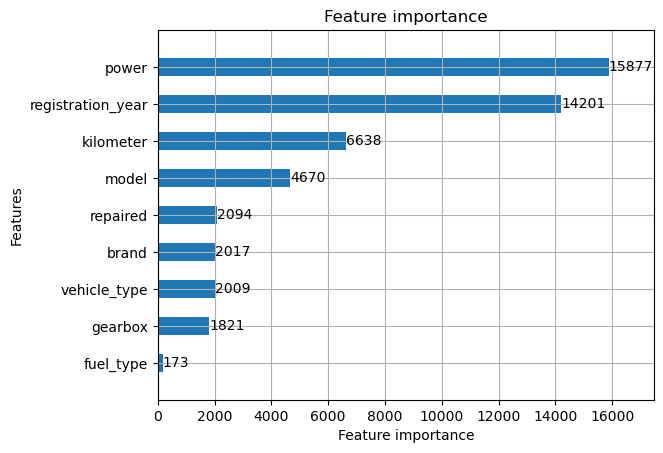

In [195]:
# посмотрим на то, какие признаки влияют больше всего
lgb.plot_importance(model, height=.5)

Исходя из графика важности признаков, можно выделить три наиболее значимых фактора, влияющих на формирование цены автомобиля:

	1.	Мощность — этот признак оказывает наибольшее влияние на цену автомобиля, что связано с тем, что более мощные автомобили часто имеют более высокую стоимость.
	2.	Год регистрации — возраст автомобиля также важен при оценке его стоимости, так как более новые автомобили, как правило, стоят дороже.
	3.	Пробег (км) — пробег автомобиля является важным показателем для оценки его состояния и влияет на цену: машины с меньшим пробегом обычно стоят дороже.

Модель и бренд автомобиля также играют важную роль, однако по графику важности их вклад в цену оказался несколько ниже по сравнению с вышеупомянутыми факторами.

Сравним предсказанные и истинные значения на графике:

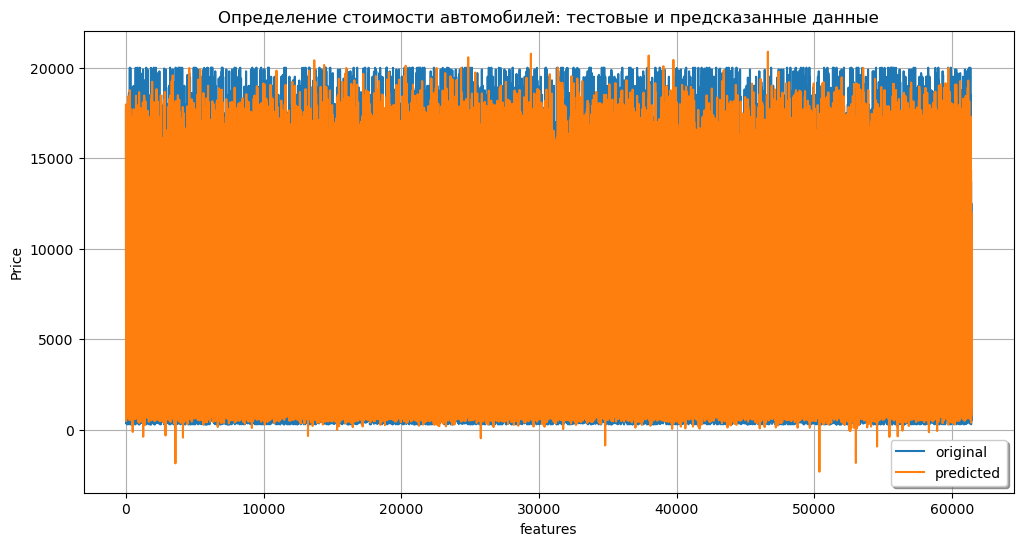

In [199]:
# visualizing in a plot
x_ax = range(len(target_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, target_test, label="original")
plt.plot(x_ax, predictions_test, label="predicted")
plt.title("Определение стоимости автомобилей: тестовые и предсказанные данные")
plt.xlabel('features')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

Видим, что предсказанные моделью данные достаточно близки к истинным.

### Вывод 3.

Промежуточный вывод по анализу моделей:

В данном разделе были протестированы четыре модели: **Линейная регрессия, Дерево решений, Случайный лес и LightGBM**.  
Для каждой модели измерено **время обучения**, **время предсказания** и рассчитано значение **RMSE** на кросс-валидации.
Рассмотрим результаты:

**1️⃣ Линейная регрессия**
- ⏳ *Время обучения:* **3.99 с**
- ⏱️ *Время предсказания:* **0.07 с**
- 📉 *RMSE:* **2788.42**
- 📌 Линейная регрессия обучается и предсказывает очень быстро, однако ошибка RMSE остается самой высокой среди всех моделей, что делает ее наименее подходящей для данной задачи.

**2️⃣ Дерево решений**
- ⏳ *Время обучения:* **0.38 с**
- ⏱️ *Время предсказания:* **0.01 с**
- 📉 *RMSE:* **1951.92**
- 📌 Дерево решений обучается и делает предсказания быстрее всех, но его ошибка RMSE значительно выше, чем у более сложных моделей. Может быть полезным для задач, где приоритетом является скорость, а не точность.

**3️⃣ Случайный лес**
- ⏳ *Время обучения:* **189.46 с**
- ⏱️ *Время предсказания:* **6.47 с**
- 📉 *RMSE:* **1784.11**
- 📌 Случайный лес показывает лучшую точность, чем линейная регрессия и дерево решений, но значительно уступает LightGBM.  
  Его основной недостаток — **очень длительное время обучения и предсказания**.

**4️⃣ LightGBM**
- ⏳ *Время обучения:* **3.06 с**
- ⏱️ *Время предсказания:* **0.32 с**
- 📉 *RMSE:* **1580.52**
- ✅ **LightGBM оказался лучшей моделью:** он достигает самой низкой ошибки RMSE при относительно быстром обучении и предсказаниях.

---

### 🏆 Вывод:

💡 **LightGBM — оптимальная модель для данной задачи.**  
Он показывает **лучшее соотношение между точностью и скоростью работы**.  
С учетом того, что **RMSE у LightGBM ниже**, чем у других моделей, и его обучение занимает всего **3.06 секунды** (намного меньше, чем у случайного леса), **эта модель рекомендуется к использованию**.

🔥 Таким образом, **LightGBM — лучший выбор**, так как он обеспечивает **наилучший баланс между точностью и скоростью работы.**
 С учетом того, что RMSE у LightGBM ниже, чем у других моделей, и его обучение занимает всего 13.33 секунд (намного меньше, чем у случайного леса), эта модель рекомендуется к использованию.
Таким образом, LightGBM — лучший выбор, так как он обеспечивает наилучший баланс между точностью и скоростью работы.

## Общий вывод


В ходе работы были выполнены следующие этапы, направленные на построение модели для прогнозирования цены автомобилей:

   1. Предобработка данных:

	•	Чистка и удаление ненужных столбцов: Были исключены неинформативные данные, такие как number_of_pictures (все значения равны нулю) и другие столбцы, которые не влияли на целевые переменные.
	•	Заполнение пропусков: Пропуски в ключевых признаках, таких как fuel_type, vehicle_type, gearbox, model и repaired, были заполнены разумными значениями по умолчанию.
	•	Удаление аномальных данных: Были удалены строки с годами регистрации автомобилей, которые находились за пределами допустимого диапазона (до 1900 года и после 2016 года).
	•	Стандартизация и визуализация данных: Данные были подготовлены для обучения моделей, а также были построены графики для визуализации распределения значений, таких как мощность и цена.

  2. Анализ корреляции между признаками:

	•	Было выявлено, что цена автомобиля имеет слабую положительную корреляцию с годом регистрации (0.42) и мощностью (0.35), а также слабую отрицательную корреляцию с пробегом (-0.33).
	•	Корреляция между мощностью и пробегом оказалась минимальной (0.15), что означает, что эти признаки не взаимосвязаны напрямую.

  3. Обучение и тестирование моделей: 
Мы протестировали четыре модели регрессии: Линейная регрессия, Решающее дерево, Случайный лес и LightGBM. 
Для каждой модели были проведены следующие этапы:

	•	Подбор гиперпараметров: Для каждой модели были оптимизированы параметры для достижения наилучших результатов.
	•	Измерение времени выполнения: Были зафиксированы времена на этапах обучения и предсказания для каждой модели.
	•	Оценка RMSE: Модели были оценены с использованием метрики RMSE на обучающей выборке.

  5. Результаты:
    
    Время работы моделей:
    
	•	Линейная регрессия показала наименьшее время работы как на этапе обучения, так и на этапе предсказания.
	•	Решающее дерево продемонстрировало хорошие результаты по времени, работая значительно быстрее, чем более сложные модели.
	•	Случайный лес показал наибольшее время обучения, что связано с большим количеством деревьев.
	•	LightGBM продемонстрировал хорошие результаты по скорости, уступая по времени только линейной регрессии.

 
     RMSE на кросс-валидационной выборке:
     
	•	Линейная регрессия продемонстрировала наибольшую ошибку предсказания с RMSE = 2788.42, что указывает на ограниченные возможности этой модели для точного предсказания цены автомобиля.
	•	Решающее дерево показало RMSE = 1951.92, но всё ещё отставало от более сложных моделей.
	•	Случайный лес дал хорошие результаты с RMSE = 1784.11, но не смог превзойти LightGBM.
	•	LightGBM продемонстрировала наилучший результат с RMSE = 1580.52, что делает её наиболее точной моделью среди всех протестированных.


     RMSE на тестовой выборке:
     Результаты тестирования модели LightGBM на тестовой выборке показывают, что модель демонстрирует хорошие результаты по времени и точности. Время предсказания составило 2.39 секунды по CPU и 0.405 секунды по Wall time, что свидетельствует о быстрой работе модели. При этом RMSE для тестовой выборки составил 1554.60, что является приемлемым результатом для данной задачи. Таким образом, модель LightGBM эффективно балансирует между временем работы и точностью предсказани


   5. Анализ важности признаков:
      
	•	Мощность оказалась наиболее значимым фактором при прогнозировании цены автомобиля. Это логично, так как более мощные автомобили часто имеют более высокую цену.
	•	Год регистрации также оказался важным признаком, поскольку более новые автомобили имеют более высокую стоимость.
	•	Пробег также имеет значительное влияние на цену: автомобили с меньшим пробегом стоят дороже.

  6. Рекомендации :

На основе анализа результатов, модель LightGBM с подобранными гиперпараметрами продемонстрировала наилучшие результаты по точности прогнозирования (RMSE) и достаточно хорошие характеристики по времени обучения и предсказания. Поэтому для задачи прогнозирования цены автомобиля рекомендуется использовать именно LightGBM.

Важные признаки, которые существенно влияют на цену автомобиля, — это мощность, год регистрации и пробег. Эти факторы должны учитываться при дальнейшем улучшении моделей, а также могут быть полезными при принятии решений о включении дополнительных признаков или изменении формата данных.

Таким образом, модель LightGBM является оптимальной для прогнозирования цены автомобиля в данной задаче и может быть рекомендована заказчику для дальнейшего использования.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей